<a href="https://colab.research.google.com/github/olgasherbiena/KPI/blob/IDA/1_5_Data_visualization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub
from kagglehub import KaggleDatasetAdapter

## Load the Data

In [2]:
import os

dataset_path = kagglehub.dataset_download("albertobircoci/support-ticket-priority-dataset-50k")
print("Path to dataset files:", dataset_path)

support_ticket_data = pd.read_csv(os.path.join(dataset_path, "Support_tickets.csv"))

Using Colab cache for faster access to the 'support-ticket-priority-dataset-50k' dataset.
Path to dataset files: /kaggle/input/support-ticket-priority-dataset-50k


In [3]:
print(support_ticket_data.columns)

Index(['ticket_id', 'day_of_week', 'day_of_week_num', 'company_id',
       'company_size', 'company_size_cat', 'industry', 'industry_cat',
       'customer_tier', 'customer_tier_cat', 'org_users', 'region',
       'region_cat', 'past_30d_tickets', 'past_90d_incidents', 'product_area',
       'product_area_cat', 'booking_channel', 'booking_channel_cat',
       'reported_by_role', 'reported_by_role_cat', 'customers_affected',
       'error_rate_pct', 'downtime_min', 'payment_impact_flag',
       'security_incident_flag', 'data_loss_flag', 'has_runbook',
       'customer_sentiment', 'customer_sentiment_cat', 'description_length',
       'priority', 'priority_cat'],
      dtype='object')


In [4]:
df_support = support_ticket_data[['day_of_week_num', 'company_size_cat', 'industry_cat', 'region_cat', 'customer_tier_cat', 'customers_affected', 'priority_cat']]
feature_names = support_ticket_data.columns[:5]

df_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   day_of_week_num     50000 non-null  int64
 1   company_size_cat    50000 non-null  int64
 2   industry_cat        50000 non-null  int64
 3   region_cat          50000 non-null  int64
 4   customer_tier_cat   50000 non-null  int64
 5   customers_affected  50000 non-null  int64
 6   priority_cat        50000 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB


In [5]:
# унікальні класи
print("Unique classes:", set(df_support['priority_cat']))  # або 'priority_cat' для числового варіанту
print(":", set(df_support['industry_cat']))
print(":", set(df_support['company_size_cat']))
print(":", set(df_support['day_of_week_num']))
print(":", set(df_support['region_cat']))
print("Unique classes:", set(df_support['customer_tier_cat']))  # або 'priority_cat' для числового варіанту
print("Unique classes:", set(df_support['customers_affected']))

# якщо хочеш "людинозрозумілі" назви класів
print("Class names:", support_ticket_data['priority_cat'].unique())
print("Class names:", support_ticket_data['industry_cat'].unique())
print("Class names:", support_ticket_data['company_size_cat'].unique())
print("Class names:", support_ticket_data['day_of_week_num'].unique())
print("Class names:", support_ticket_data['region_cat'].unique())
print("Class names:", support_ticket_data['customer_tier_cat'].unique())
print("Class names:", support_ticket_data['customers_affected'].unique())



Unique classes: {1, 2, 3}
: {1, 2, 3, 4, 5, 6, 7}
: {1, 2, 3}
: {1, 2, 3, 4, 5, 6, 7}
: {1, 2, 3}
Unique classes: {1, 2, 3}
Unique classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,

# Pairwise correlation of columns

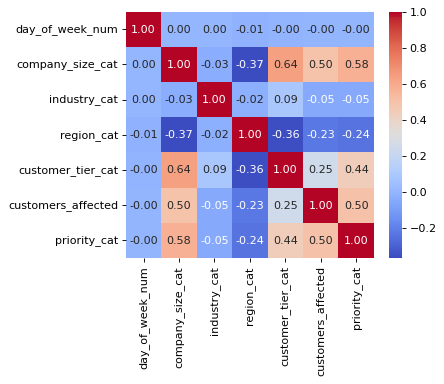

In [6]:
corr = df_support.corr()
fig, ax = plt.subplots(figsize=(5, 4), dpi = 80)
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()
# This heatmap shows the correlation between all numeric features in the wine dataset.
# Values close to 1 indicate a strong positive relationship, values close to -1 indicate a strong negative relationship,
# and values near 0 mean little or no linear correlation.
# Correlation with the target can be useful, because it shows which features are most related to the class labels.
#However, strong correlation between features themselves may cause multicollinearity,
#which can be a problem for some machine learning models.

## Boxplots
for more examples see https://seaborn.pydata.org/generated/seaborn.boxplot.html

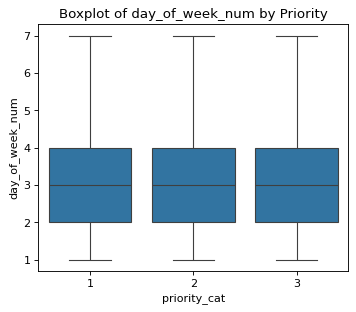

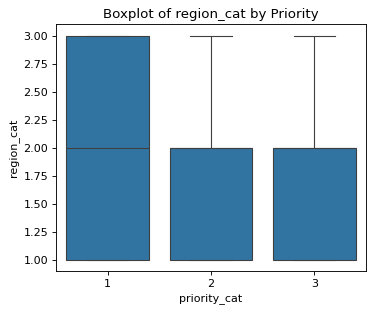

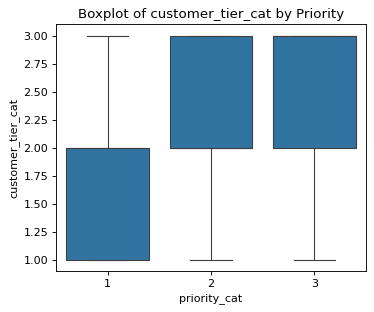

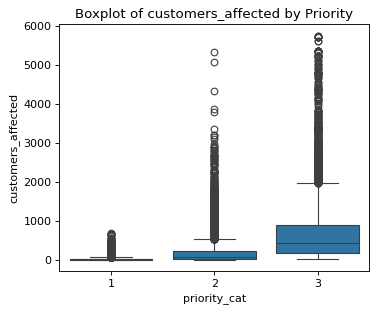

In [7]:
features_name = ['day_of_week_num', 'region_cat', 'customer_tier_cat', 'customers_affected']

for i in range(len(features_name)):
    plt.figure(figsize=(5, 4), dpi=80)
    ax = sns.boxplot(x='priority_cat', y=features_name[i], data=support_ticket_data)
    plt.title(f"Boxplot of {features_name[i]} by Priority")
    plt.show()


# Each boxplot compares the distribution of a single feature across the three wine classes.
# The box shows the interquartile range (IQR), the line inside is the median, and the whiskers/outliers indicate variability.
# If the boxes for different classes do not overlap much, it means that this feature is a good candidate for distinguishing between wine types.

## Pairplot
for more examples see
https://seaborn.pydata.org/generated/seaborn.pairplot.html

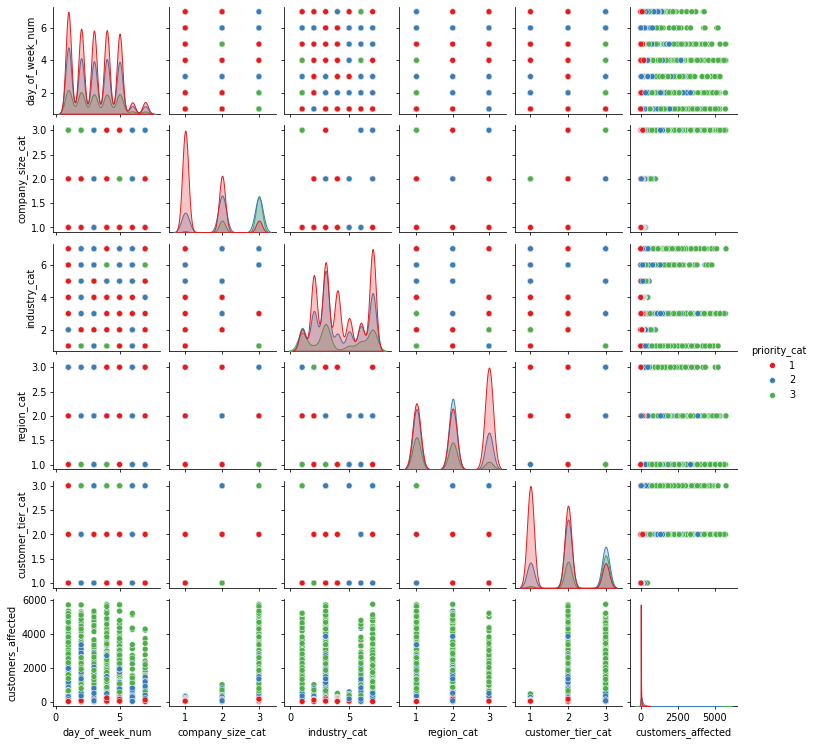

In [8]:
plt.rcParams['figure.dpi'] = 70   # дефолт ~100, для зменшеня розміру зображення
sns.pairplot(df_support, hue="priority_cat", palette = 'Set1',  height=1.8)
plt.show()
#The pairplot shows scatterplots for every pair of features, colored by the wine class.
# This helps us visually check if classes are separable in 2D feature spaces and also reveals potential correlations or clusters.
# Diagonal plots show the distribution (histogram/density) of each single feature.

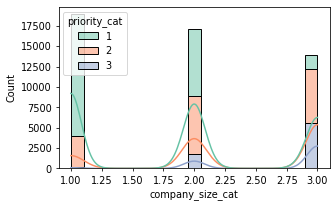

In [9]:
plt.figure(figsize=(5,3))
sns.histplot(data=df_support, x="company_size_cat", hue="priority_cat", kde=True, multiple="stack", palette = 'Set2')
plt.show()
# This shows the distribution of one feature (alcohol) for each wine class.
# Overlaps indicate similarities, while clear separation suggests this feature helps classification.
# kde=True adds a smooth density curve on top of the histogram

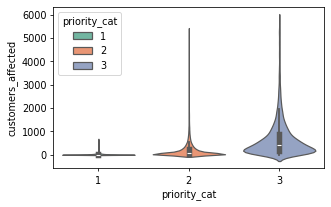

In [10]:
plt.figure(figsize=(5,3))
sns.violinplot(x="priority_cat", y="customers_affected", hue="priority_cat",
               data=df_support, palette="Set2")
plt.show()
#A violin plot combines a boxplot with a density curve, so you can see both the summary
# statistics and the shape of the distribution for each class.

# **K_Nearest_Neighbors**

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display="text")

In [12]:
support_ticket_data.head()

,ticket_id,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,...,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
0,1000000000,Wed,3,100015,Small,1,media,7,Basic,1,...,6,0,0,0,0,neutral,2,227,low,1
1,1000000001,Sat,6,100023,Small,1,healthcare,5,Basic,1,...,2,0,0,0,0,neutral,2,461,low,1
2,1000000002,Mon,1,100012,Small,1,gaming,4,Basic,1,...,0,0,0,0,1,positive,3,306,low,1
3,1000000003,Wed,3,100003,Small,1,media,7,Plus,2,...,16,0,0,0,1,neutral,2,363,medium,2
4,1000000004,Mon,1,100019,Small,1,ecommerce,2,Plus,2,...,6,0,0,0,0,neutral,2,442,low,1


In [13]:
support_ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ticket_id               50000 non-null  int64  
 1   day_of_week             50000 non-null  object 
 2   day_of_week_num         50000 non-null  int64  
 3   company_id              50000 non-null  int64  
 4   company_size            50000 non-null  object 
 5   company_size_cat        50000 non-null  int64  
 6   industry                50000 non-null  object 
 7   industry_cat            50000 non-null  int64  
 8   customer_tier           50000 non-null  object 
 9   customer_tier_cat       50000 non-null  int64  
 10  org_users               50000 non-null  int64  
 11  region                  50000 non-null  object 
 12  region_cat              50000 non-null  int64  
 13  past_30d_tickets        50000 non-null  int64  
 14  past_90d_incidents      50000 non-null

In [14]:
#рахуємо к-сть пропущених даних
support_ticket_data.isnull().sum()

,0
ticket_id,0
day_of_week,0
day_of_week_num,0
company_id,0
company_size,0
company_size_cat,0
industry,0
industry_cat,0
customer_tier,0
customer_tier_cat,0


In [15]:
columns_to_drop = [
    'ticket_id', 'day_of_week', 'company_id', 'company_size', 'industry',
    'customer_tier', 'region', 'product_area', 'booking_channel',
    'reported_by_role', 'priority', 'customer_sentiment', 'org_users', 'past_90d_incidents', 'past_30d_tickets',
]

support_ticket_data = support_ticket_data.drop(columns=columns_to_drop, axis=1)

In [16]:
support_ticket_data['priority_cat'].describe()

,priority_cat
count,50000.000000
mean,1.650000
std,0.726299
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,3.000000


In [17]:
support_ticket_data.head()

,day_of_week_num,company_size_cat,industry_cat,customer_tier_cat,region_cat,product_area_cat,booking_channel_cat,reported_by_role_cat,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment_cat,description_length,priority_cat
0,3,1,7,1,3,3,1,1,2,5.451201,6,0,0,0,0,2,227,1
1,6,1,5,1,1,5,3,3,24,2.495538,2,0,0,0,0,2,461,1
2,1,1,4,1,3,6,3,2,1,3.328402,0,0,0,0,1,3,306,1
3,3,1,7,2,1,5,3,4,25,2.931906,16,0,0,0,1,2,363,2
4,1,1,2,2,1,5,1,1,28,3.255222,6,0,0,0,0,2,442,1


In [18]:
support_ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day_of_week_num         50000 non-null  int64  
 1   company_size_cat        50000 non-null  int64  
 2   industry_cat            50000 non-null  int64  
 3   customer_tier_cat       50000 non-null  int64  
 4   region_cat              50000 non-null  int64  
 5   product_area_cat        50000 non-null  int64  
 6   booking_channel_cat     50000 non-null  int64  
 7   reported_by_role_cat    50000 non-null  int64  
 8   customers_affected      50000 non-null  int64  
 9   error_rate_pct          50000 non-null  float64
 10  downtime_min            50000 non-null  int64  
 11  payment_impact_flag     50000 non-null  int64  
 12  security_incident_flag  50000 non-null  int64  
 13  data_loss_flag          50000 non-null  int64  
 14  has_runbook             50000 non-null

# **Train Test Split**

In [19]:
X = support_ticket_data.drop(['priority_cat'], axis = 1)
y = support_ticket_data['priority_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

Standardize the Variables
Алгоритми машинного навчання, що використовують відстані (наприклад KNN) чутливі до масштабу ознак

StandardScaler приводить всі ознаки до одного масштабу:

-середнє значення = 0, стандартне відхилення = 1

(щоб жодна змінна не «домінувала» тільки через свій масштаб)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

KNN model

In [22]:
knn = KNeighborsClassifier(n_neighbors=15)

In [23]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [24]:
pred = knn.predict(scaled_X_test)

Evaluation

In [25]:
print(confusion_matrix(y_test,pred))

[[4622  409    2]
 [ 987 2421   87]
 [   8  587  877]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.82      0.92      0.87      5033
           2       0.71      0.69      0.70      3495
           3       0.91      0.60      0.72      1472

    accuracy                           0.79     10000
   macro avg       0.81      0.74      0.76     10000
weighted avg       0.80      0.79      0.79     10000



In [27]:
print(accuracy_score(y_test,pred))

0.792


Choosing a K Value

In [28]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

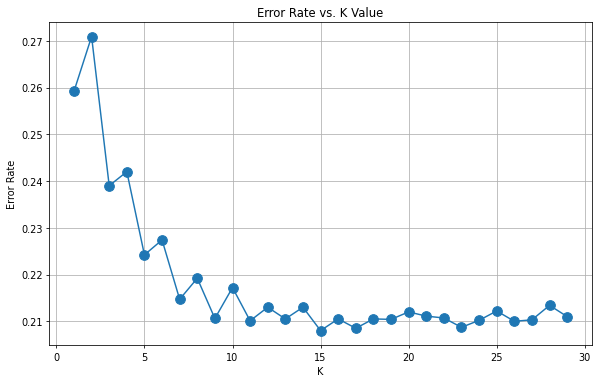

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))
print()
print(accuracy_score(y_test,pred))

[[4563  467    3]
 [ 993 2375  127]
 [   8  549  915]]

              precision    recall  f1-score   support

           1       0.82      0.91      0.86      5033
           2       0.70      0.68      0.69      3495
           3       0.88      0.62      0.73      1472

    accuracy                           0.79     10000
   macro avg       0.80      0.74      0.76     10000
weighted avg       0.79      0.79      0.78     10000


0.7853


Найважливіші параметри (коротко)

n_neighbors = 15 — кількість найближчих сусідів, які враховуються при класифікації

metric = 'minkowski' — метрика для обчислення відстаней

p = 2 — параметр для Minkowski: p=2 → евклідова відстань, p=1 → мангеттенська

weights ∈ {'uniform', 'distance'} — спосіб врахування сусідів: усі однаково чи ближчі мають більшу вагу, default=’uniform’

In [31]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

# **Decision_Tree**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import set_config
set_config(display="text")

In [33]:
support_ticket_data.head()

,day_of_week_num,company_size_cat,industry_cat,customer_tier_cat,region_cat,product_area_cat,booking_channel_cat,reported_by_role_cat,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment_cat,description_length,priority_cat
0,3,1,7,1,3,3,1,1,2,5.451201,6,0,0,0,0,2,227,1
1,6,1,5,1,1,5,3,3,24,2.495538,2,0,0,0,0,2,461,1
2,1,1,4,1,3,6,3,2,1,3.328402,0,0,0,0,1,3,306,1
3,3,1,7,2,1,5,3,4,25,2.931906,16,0,0,0,1,2,363,2
4,1,1,2,2,1,5,1,1,28,3.255222,6,0,0,0,0,2,442,1


In [34]:
support_ticket_data.columns

Index(['day_of_week_num', 'company_size_cat', 'industry_cat',
       'customer_tier_cat', 'region_cat', 'product_area_cat',
       'booking_channel_cat', 'reported_by_role_cat', 'customers_affected',
       'error_rate_pct', 'downtime_min', 'payment_impact_flag',
       'security_incident_flag', 'data_loss_flag', 'has_runbook',
       'customer_sentiment_cat', 'description_length', 'priority_cat'],
      dtype='object')

In [35]:
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(50000, 17) (50000,)


Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# stratify=y: зберігає ті самі пропорції класів у train і test (стратифіковане розбиття)
# Особливо важливо для незбалансованих даних.

In [37]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(40000, 17) (40000,)
(10000, 17) (10000,)


Decision Tree
Note: scaling is NOT required for trees

Найважливіші параметри (коротко)

criterion={'gini','entropy'} — функція розщеплення

max_depth=None — максимальна глибина дерева (контроль пере/недонавчання)

min_samples_split=2 — мінімум зразків, щоб вузол ділився

min_samples_leaf=1 — мінімум зразків у листку

class_weight=None — корисно для незбалансованих даних ('balanced')

random_state — для відтворюваності

In [38]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    min_samples_leaf=2,
    random_state=42
)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=42)

In [40]:
y_pred = model.predict(X_test)

Model Evaluation

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
#depth = 3 -> 78%
#depth = 10 -> 92%
#depth = 15 -> 93%
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.96      0.96      5000
           2       0.89      0.89      0.89      3500
           3       0.91      0.87      0.89      1500

    accuracy                           0.93     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.93      0.93      0.93     10000



In [43]:
print(confusion_matrix(y_test, y_pred))

[[4825  175    0]
 [ 247 3126  127]
 [   0  193 1307]]


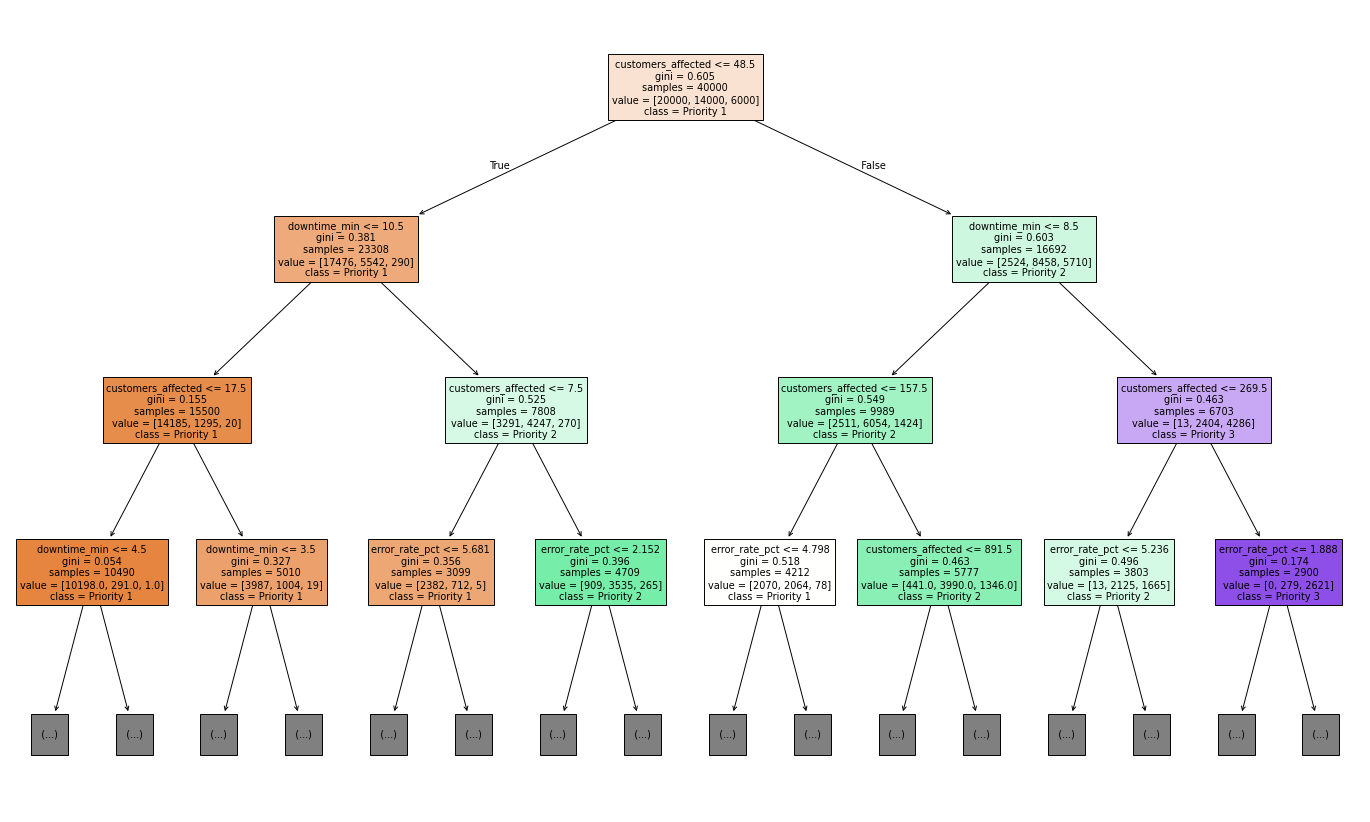

In [44]:
plt.figure(figsize=(25, 15))
plot_tree(model, feature_names = ['day_of_week_num',	'company_size_cat',	'industry_cat',
                                  'customer_tier_cat',	'region_cat',	'product_area_cat',
                                  'booking_channel_cat', 'reported_by_role_cat',	'customers_affected',
                                  'error_rate_pct',	'downtime_min',	'payment_impact_flag',	'security_incident_flag',	'data_loss_flag',
                                  'has_runbook',	'customer_sentiment_cat',	'description_length'],
          class_names=['Priority 1', 'Priority 2', 'Priority 3'], max_depth=3, filled = True, fontsize=10)
plt.show()

In [45]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

# **SVM**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(display='text')

In [47]:
support_ticket_data.keys()

Index(['day_of_week_num', 'company_size_cat', 'industry_cat',
       'customer_tier_cat', 'region_cat', 'product_area_cat',
       'booking_channel_cat', 'reported_by_role_cat', 'customers_affected',
       'error_rate_pct', 'downtime_min', 'payment_impact_flag',
       'security_incident_flag', 'data_loss_flag', 'has_runbook',
       'customer_sentiment_cat', 'description_length', 'priority_cat'],
      dtype='object')

In [48]:

df_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   day_of_week_num     50000 non-null  int64
 1   company_size_cat    50000 non-null  int64
 2   industry_cat        50000 non-null  int64
 3   region_cat          50000 non-null  int64
 4   customer_tier_cat   50000 non-null  int64
 5   customers_affected  50000 non-null  int64
 6   priority_cat        50000 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB


In [49]:
df_support.head()

,day_of_week_num,company_size_cat,industry_cat,region_cat,customer_tier_cat,customers_affected,priority_cat
0,3,1,7,3,1,2,1
1,6,1,5,1,1,24,1
2,1,1,4,3,1,1,1
3,3,1,7,1,2,25,2
4,1,1,2,1,2,28,1


In [50]:
df_support = support_ticket_data[['day_of_week_num', 'company_size_cat', 'industry_cat',
       'customer_tier_cat', 'region_cat', 'product_area_cat',
       'booking_channel_cat', 'reported_by_role_cat', 'customers_affected',
       'error_rate_pct', 'downtime_min', 'payment_impact_flag',
       'security_incident_flag', 'data_loss_flag', 'has_runbook',
       'customer_sentiment_cat', 'description_length']]
X_train, X_test, y_train, y_test = train_test_split(df_support, support_ticket_data['priority_cat'], test_size=0.30, random_state=101)

SVM дуже чутливий до масштабу ознак. StandardScaler() — найпоширеніший варіант для SVM

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

SVM model
Реалізація базується на бібліотеці libsvm

Найважливіші параметри SVC:

C=1.0 — коефіцієнт регуляризації. Чим більше C, тим менше регуляризації → модель намагається правильно класифікувати кожну точку (ризик переобучення). Чим менше C, тим більше регуляризації → спрощена межа, можливі помилки (краще узагальнення).

kernel='rbf' — ядро, яке використовується для побудови межі.

'linear' — лінійна межа; швидко, коли дані майже лінійно роздільні.
'rbf' (радіальне базисне) — універсальне, добре працює в більшості випадків.
gamma='scale' — впливає на “радіус впливу” однієї точки.

Маленьке gamma → широка межа (гладка, але може недонавчатись).
Велике gamma → межа «підганяється» під точки (ризик переобучення).
'scale' — стандартне значення, зазвичай добре працює.

In [52]:
model = SVC(C=1, gamma = 1, kernel = 'rbf')

In [53]:
model.fit(scaled_X_train,y_train)

SVC(C=1, gamma=1)

In [54]:
y_pred = model.predict(scaled_X_test)

In [55]:
print(confusion_matrix(y_test, y_pred))

[[6383 1143    0]
 [ 841 4354   45]
 [   1 1981  252]]


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.85      0.87      7526
           2       0.58      0.83      0.68      5240
           3       0.85      0.11      0.20      2234

    accuracy                           0.73     15000
   macro avg       0.77      0.60      0.58     15000
weighted avg       0.77      0.73      0.70     15000



In [57]:
param_grid = {'C': [0.1, 1], 'gamma': [1,0.1], 'kernel': ['rbf']}

In [58]:
grid = GridSearchCV(SVC(), param_grid, cv=2,refit=True)

# grid = GridSearchCV(
#     estimator=model,     # яку модель навчаємо (наприклад, SVC())
#     param_grid=params,   # словник з гіперпараметрами для перебору
#     cv=5                  # кількість фолдів у крос-валідації
# )

GridSearchCV(SVC(), param_grid, refit=True)

перебирає всі комбінації параметрів з param_grid;
автоматично проводить крос-валідацію для кожного набору параметрів;
обирає найкращу модель;
refit=True → після пошуку ще раз навчає SVC на всіх даних з найкращими параметрами.

In [59]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']})

In [60]:
GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [61]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [62]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [63]:
grid_predictions = grid.predict(scaled_X_test)

In [64]:
print(confusion_matrix(y_test,grid_predictions))

[[7052  473    1]
 [ 644 4442  154]
 [   0  324 1910]]


In [65]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93      7526
           2       0.85      0.85      0.85      5240
           3       0.92      0.85      0.89      2234

    accuracy                           0.89     15000
   macro avg       0.90      0.88      0.89     15000
weighted avg       0.89      0.89      0.89     15000



# **Random Forest**

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display="text")

In [67]:
print("Розмір датасету:", X.shape)       # (70000, 784)
print("Кількість зображень:", len(X))   # 70000
print("Кількість ознак (пікселів):", X.shape[1])  # 784 = 28*28
print("Унікальні класи:", np.unique(y)) # 0–9

Розмір датасету: (50000, 17)
Кількість зображень: 50000
Кількість ознак (пікселів): 17
Унікальні класи: [1 2 3]


ADAboot

In [68]:
from sklearn.ensemble import AdaBoostClassifier

# 2. Створюємо модель AdaBoost
# Вона буде використовувати багато простих дерев рішень (за замовчуванням max_depth=1)
ada_model = AdaBoostClassifier(
    n_estimators=100,      # Кількість "спеціалістів" у команді
    random_state=42
)

# 3. Навчаємо модель на тих самих даних
print("Навчання моделі AdaBoost...")
ada_model.fit(X_train, y_train)
print("Навчання завершено!")

# 4. Робимо прогноз
y_pred_ada = ada_model.predict(X_test)

# 5. Оцінюємо якість
print("\n--- Звіт про якість моделі AdaBoost ---")
print(classification_report(y_test, y_pred_ada))

Навчання моделі AdaBoost...
Навчання завершено!

--- Звіт про якість моделі AdaBoost ---
              precision    recall  f1-score   support

           1       0.98      0.75      0.85      7526
           2       0.67      0.97      0.79      5240
           3       0.99      0.71      0.83      2234

    accuracy                           0.82     15000
   macro avg       0.88      0.81      0.82     15000
weighted avg       0.87      0.82      0.83     15000

